In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
X=df.drop("deposit",axis=1) 
Y=df["deposit"]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [8]:
from sklearn.metrics import classification_report

In [9]:
def create_model(model) : 
    model.fit(X_train,Y_train) 
    Y_pred=model.predict(X_test) 
    print(classification_report(Y_test,Y_pred))
    return model

In [10]:
from sklearn.linear_model import LogisticRegression  

In [11]:
lr=LogisticRegression()

In [12]:
lr=create_model(lr) 

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.77      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.77      0.77      0.77      3349



In [13]:
from sklearn.tree import DecisionTreeClassifier 

In [14]:
dt=DecisionTreeClassifier()

In [15]:
dt=create_model(dt) 

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1760
           1       0.77      0.76      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [16]:
dt.feature_importances_

array([0.07846137, 0.03259765, 0.01872404, 0.01276065, 0.00045636,
       0.08378327, 0.04314541, 0.00384368, 0.06260849, 0.07751802,
       0.0945716 , 0.35489879, 0.02164825, 0.06514775, 0.00662535,
       0.04320934])

In [17]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [18]:
from sklearn import tree

In [19]:
features=X.columns

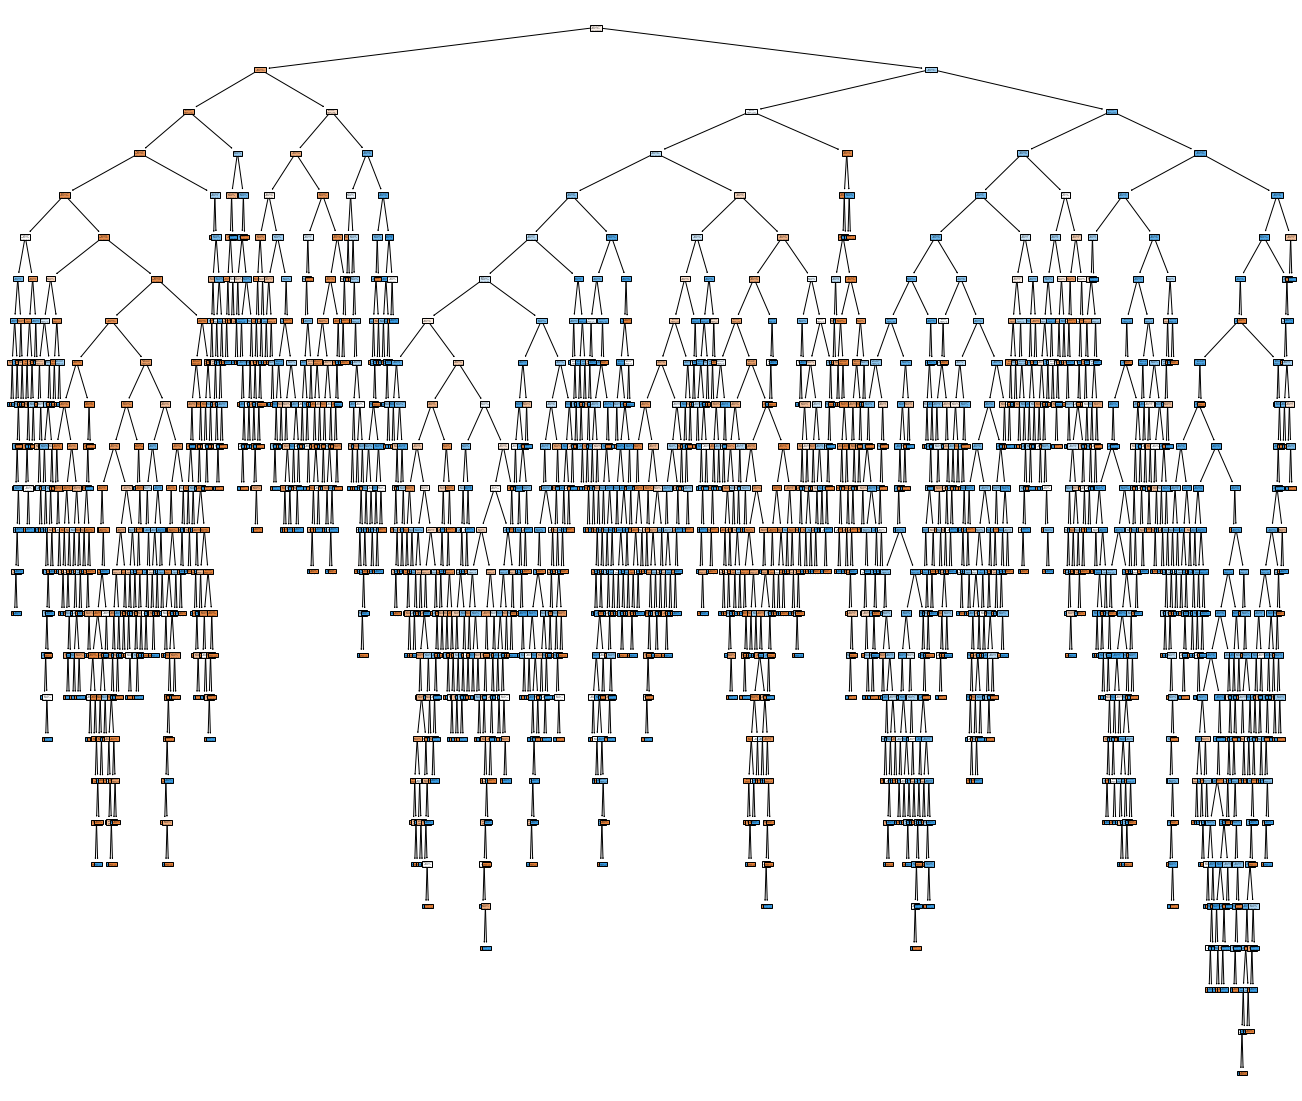

In [20]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)